# GA 2.2: M is for Modelling

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.2. For: 22 November, 2024*



## Finite element formulation for the diffusion equation

In this assignment we will model the heat equation in 2D on a geometry that is non-trivial. Let us first recall the diffusion equation with source term:

$$\frac{\partial u}{\partial t} = \nu \left(\frac{\partial^{2} u}{{\partial x}^{2}} + \frac{\partial^{2} u}{{\partial y}^{2}}\right) + f$$

with Dirichlet boundary conditions (prescribed values $\bar{u}$) on part of the boundary ($\Gamma_D$) and Neumann boundary conditions (prescribed flux $h$) on the remainder of the boundary ($\Gamma_N$):

$$
u =\bar{u} \quad \text{on} \quad \Gamma_D \\
\nu \nabla u\cdot \mathbf{n} = h \quad \text{on} \quad \Gamma_N
$$

Here, the diffusion equation is interpreted as the heat equation, meaning that the unknown field $u(x,y,t)$ is the temperature and the source term $f$ is a heat source. This equation can be turned into a discretized form with the standard finite element procedure. Finite elements are only used for the discretization in space, discretization in time will be discussed later. 

$$ \left[\int_{\Omega} \mathbf{N}^T \mathbf{N} \,d \Omega\right] \dot{\mathbf{u}} + \left[\int_{\Omega} \mathbf{B}^T \nu \mathbf{B} \,d \Omega\right] \mathbf{u} = \int_{\Omega} \mathbf{N}^T f \,d \Omega + \int_{\Gamma_N} \mathbf{N}^T h \,d \Gamma$$ 

With respect to the Poisson equation in 1D there are several differences:
- There is a time-dependent term
- Neumann boundary conditions are evaluated in a boundary integral which is now a line integral
- The $\mathbf{B}$-matrix is now truly a matrix (no longer a row vector) defined as $\nabla\mathbf{N}$

Using the  symbol $\mathbf{M}$ for the matrix associated with $\dot{\mathbf{u}}$, we can write:

$$ \mathbf{M \dot{u}} + \mathbf{K u} = \mathbf{f}$$ 

where:

$$ \mathbf{M} = \int_{\Omega} \mathbf{N}^T \mathbf{N} \,d \Omega$$

$$ \mathbf{K} = \int_{\Omega} \mathbf{B}^T \nu \mathbf{B} $$

$$ \mathbf{f} = \int_{\Omega} \mathbf{N}^T f \,d \Omega + \int_{\Gamma_N} \mathbf{N}^T h \,d \Gamma $$

Now we have introduced a spatial discretization of the time-dependent Partial Differential Equation, we still need to find a way to solve it in time. Suppose we know the solution up to time step $n$ (in the beginning of the analysis, that will be the initial conditions). To compute the result at time-step $n+1$ we want to solve the following equation:

$$ \mathbf{M \dot{u}}_{n+1} + \mathbf{K u}_{n+1} = \mathbf{f}_{n+1}$$ 

The problem is however that there are two unknown vectors in this equation. The nodal temperatures $\mathbf{u}$ at as well as their time derivative. However, these two are not independent. We can express  at time step $n+1$ as a function of the temperature and the rate of change at time step $n$ using backward Euler:

$$ \mathbf{u}_{n+1} = \mathbf{u}_{n} + \Delta t \space \mathbf{\dot{u}}_{n+1}$$

Rearranging this equation gives:

$$ \mathbf{\dot{u}}_{n+1} = \frac{\mathbf{u}_{n+1} - \mathbf{u}_{n}}{\Delta t}$$

This relation is applied on every entry in the $\mathbf{\dot{u}}$ vector to arrive at an equation with only one vector with unknown values:

$$ \mathbf{M} \frac{\mathbf{u}_{n+1} - \mathbf{u}_{n}}{\Delta t} + \mathbf{K u}_{n+1} = \mathbf{f}_{n+1}$$ 

Rearranging to get all the unknown terms to the left hand side gives:

$$ \mathbf{M} \frac{\mathbf{u}_{n+1}}{\Delta t} + \mathbf{K u}_{n+1} = \mathbf{M} \frac{\mathbf{u}_{n}}{\Delta t} + \mathbf{f}_{n+1}$$ 

$$ \left(\frac{1}{\Delta t} \mathbf{M}  + \mathbf{K} \right) \mathbf{u}_{n+1} = \frac{1}{\Delta t} \mathbf{M} \mathbf{u}_{n} + \mathbf{f}_{n+1}$$ 

which is a linear system of equations that can be solved for $\mathbf{u}_{n+1}$:

$$ \mathbf{u}_{n+1} = \left(\frac{1}{\Delta t} \mathbf{M}  + \mathbf{K} \right)^{-1} \left( \frac{1}{\Delta t} \mathbf{M} \mathbf{u}_{n} + \mathbf{f}_{n+1} \right)$$ 

**Remark**: although we are working with the finite element method, for the time discretization we have introduced an approximation for the derivative, just as in the finite difference method. It is also possible to discretize in time with shape functions, to arrive at the *space-time finite element method*, but the option chosen in this notebook is the more common one.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; width:95%; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Todays task</b> 

Below, the code for analysis of a 2D diffusion problem is given. The implementation follows the formulation introduced above. Run the analysis and inspect code and results to answer the questions in  <code>Report.md</code>. 
    
</p>
</div>


#### Step 1: Preprocessing
A mesh of triangular elements has already been defined. A function is provided below that reads the file `bigM.msh` and stores the mesh data in two arrays, one with coordinates of the nodes, and one that defines the elements. A function is also provided that visualizes the mesh. Run the code block below to read the mesh file and visualize it. 

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
Note that there is a second mesh file in this folder, <code>bigM_fine.msh</code> which you can use later to perform an analysis on the same geometry with a finer mesh. To do so, change the line where the <code>readGmsh</code> function is called.
</p>
</div>


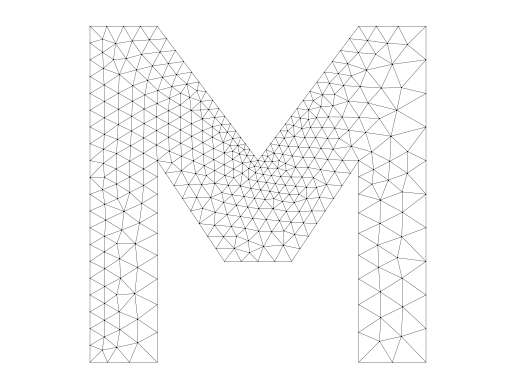

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def readGmsh (fname):
    if not fname.endswith('.msh'):
        raise RuntimeError('Unexpected mesh file extension')
    nodes = []
    elems = []
    parse_nodes = False
    parse_elems = False
    rank = 2
    nnodes = 3
    with open(fname) as msh:
        for line in msh:
            sp = line.split()
            if '$Nodes' in line:
                parse_nodes = True
            elif '$Elements' in line:
                parse_nodes = False
                parse_elems = True
            elif parse_nodes and len(sp) > 1:
                if len(sp[1:]) != 3:
                    raise SyntaxError('readGmsh: Three coordinates per node are expected')
                coords = np.array(sp[1:], dtype=np.float64)
                nodes.append(coords)
            elif parse_elems and len(sp) > 1:
                eltype = int(sp[1])
                inodes = np.array(sp[3 + int(sp[2]):], dtype=np.int32) - 1
                elems.append(inodes)
    return np.array(nodes), np.array(elems)

def plotMesh(nodes, connectivity):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.triplot(nodes[:,0], nodes[:,1], connectivity, 'k-', lw=0.2)
    plt.axis('equal')
    plt.axis('off')

nodes, connectivity = readGmsh('bigM.msh')
plotMesh(nodes, connectivity)


#### Step 2: Finite element implementation

In [2]:
from scipy import sparse
from scipy.sparse import linalg

# Function makes the coefficients of shape functions for a 3-node triangle
# the shape function for node i is defined as N_i = a_i + b_i*x + c_i*y
# this function returns the coefficients as coeff[i] = [a_i, b_i, c_i]
def get_shape_functions_T3( n1, n2, n3 ):
    coordinate_Matrix = np.ones((3,3))
    coeffs = np.zeros((3,3))
    
    coordinate_Matrix[0, 1] = n1[0]
    coordinate_Matrix[0, 2] = n1[1]
    coordinate_Matrix[1, 1] = n2[0]
    coordinate_Matrix[1, 2] = n2[1]
    coordinate_Matrix[2, 1] = n3[0]
    coordinate_Matrix[2, 2] = n3[1]
    
    # Work out constants C1, C1 and C3 for the shape function relative to each node
    c_inv = np.linalg.inv(coordinate_Matrix)
    coeffs[0] = np.dot(c_inv, (1,0,0))
    coeffs[1] = np.dot(c_inv, (0,1,0))
    coeffs[2] = np.dot(c_inv, (0,0,1))
    
    return coeffs

# Function creates the derivative shape function vector (B) of the given 3-node triangle
def get_B_matrix(n1, n2, n3):
    coeffs = get_shape_functions_T3(n1, n2, n3)
    B_matrix = [[coeffs[0][1], coeffs[1][1], coeffs[2][1]], [coeffs[0][2], coeffs[1][2], coeffs[2][2]]]
    
    return np.array(B_matrix)

# Function returns the area of the triangle with given nodes n1, n2, n3
def get_area(n1, n2, n3):
    # Defining two vectors spanning the total area
    u = n3[0:2]-n1[0:2]
    v = n2[0:2]-n1[0:2]
  
    return np.abs(np.cross(u, v))/2

# Function returns the local K-matrix of an element with given node n1, n2, n3
def get_element_K(n1, n2, n3, nu):
    B = get_B_matrix(n1, n2, n3)
    element_area = get_area(n1, n2, n3)
    return element_area*np.dot(np.transpose(B), B)*nu

# Assembly function for the K matrix
def get_global_K(nodes, connectivity, n_elem, nu):
    n_DOF = len(nodes)
    K = np.zeros((n_DOF, n_DOF))
    
    for i in range(n_elem):
        elnodes = connectivity[i,:]
        K_el = get_element_K(nodes[elnodes[0]], nodes[elnodes[1]], nodes[elnodes[2]], nu)
        K[np.ix_(elnodes,elnodes)] += K_el
                
    return K

# Assembly function for the f vector
def get_global_f(nodes, connectivity, q):
    n_DOF = len(nodes)
    f = np.zeros(n_DOF)
    
    for elem in connectivity:
        area = get_area(nodes[elem[0]], nodes[elem[1]], nodes[elem[2]])
        for i in range(3):
            f[elem[i]] += q*area/3
            
    return f

# Extra functions to obtain the M-matrix
def evaluate_N_matrix(ipcoords, n1, n2, n3):    
    coeffs = get_shape_functions_T3(n1, n2, n3)
    
    x = ipcoords[0]
    y = ipcoords[1]
    
    N_matrix = [[coeffs[0][0] + coeffs[0][1]*x + coeffs[0][2]*y, coeffs[1][0] + coeffs[1][1]*x + coeffs[1][2]*y, coeffs[2][0] + coeffs[2][1]*x + coeffs[2][2]*y]]
    
    return N_matrix

# Function takes the 3 coordinates of a triangular element and returns it's corresponding M-matrix
def get_element_M(n1, n2, n3):
    M_el = np.zeros((3,3))
    element_area = get_area(n1, n2, n3)    
    
    # Define 3-point integration scheme
    integration_locations = [(n1+n2)/2,  (n2+n3)/2,  (n3+n1)/2]
    integration_weights = [element_area/3, element_area/3, element_area/3]
    
    # Loop over integration points and add contribution to local M matrix
    for x_ip, w_ip in zip(integration_locations, integration_weights):
        N_local = evaluate_N_matrix(x_ip, n1, n2, n3)
        M_el += np.dot(np.transpose(N_local), N_local)*w_ip
    return M_el
    
# Assembly function for the M matrix
def get_global_M(nodes, connectivity, n_elem):
    n_DOF = len(nodes)
    M = np.zeros((n_DOF, n_DOF))
    
    for i in range(n_elem):
        elnodes = connectivity[i,:]
        M_el = get_element_M(nodes[elnodes[0]], nodes[elnodes[1]], nodes[elnodes[2]])
        M[np.ix_(elnodes,elnodes)] += M_el

    return M


#### Step 3: Problem definition and analysis

In [3]:
# Set problem parameters
dt = 0.005
nt = 500
nu = 1
q = 15
T_initial = 30
T_edge = 10

# Find the constrained nodes
constrained_nodes = []
free_nodes = []
n_free = 0
min_y = min(nodes[:,1])
min_x = min(nodes[:,0])
max_x = max(nodes[:,0])
for i in range(len(nodes)):
    if nodes[i,1] == min_y and nodes[i,0] > 0.5*max_x:
            constrained_nodes.append(i)
    else:
        n_free += 1
        free_nodes.append(i) 

# Set number of increments "nt" and initialize empty solution array "us"
n_DOF = len(nodes)
us = np.zeros((nt+1,n_DOF))

# Set initial conditions
us[0] = T_initial

# Assemble FE matrices
f = get_global_f(nodes, connectivity, q)
Kdense = get_global_K(nodes, connectivity, len(connectivity), nu)
Mdense = get_global_M(nodes, connectivity, len(connectivity))

K = sparse.csc_matrix(Kdense)
M = sparse.csc_matrix(Mdense)

Kmod = K + M/dt
Kmodff = Kmod[free_nodes,:][:,free_nodes]
Kmodfp = Kmod[free_nodes,:][:,constrained_nodes]

# Pre-factorize the sparse matrix to save computational costs
solver = linalg.factorized(Kmodff)

# Solve system of equations for subsequent time steps
for i in range(nt):
    us[i+1, constrained_nodes] = T_edge
    fmod = M.dot(us[i]) / dt + f
    ff = fmod[free_nodes] - Kmodfp.dot(us[i+1, constrained_nodes])
    us[i+1, free_nodes] = solver(ff)


#### Step 4: Post-processing
After the simulation has been performed, we can inspect the results. Three different post-processing functions are provided below that visualize the results in different ways.

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
For the sliders in the second and third visualization to work, it is recommended to <b>execute the code cell by cell</b> instead of with a "Run all Cells".
</p>
</div>

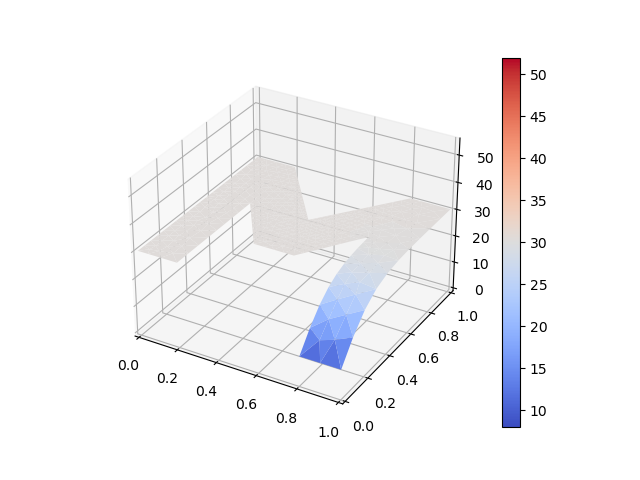

In [4]:
# first option: plot a single time step in a plot that can be rotated manually

%matplotlib widget
from ipywidgets import interact, fixed, widgets
from matplotlib import colors
from matplotlib import cm

def plot_result(nodes, result, x_lim, y_lim):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    # Set the color limits to get the right scale of our color-plot
    norm = colors.Normalize(vmin=8, vmax=52)
    
    # For each element draw a triangular surface
    x = nodes[:,0]
    y = nodes[:,1]
    ax.plot_trisurf(x, y, result, triangles=connectivity, norm=norm, cmap = cm.coolwarm)
    
    # Set the axis limits
    ax.set_ylim(y_lim)
    ax.set_xlim(x_lim)
    ax.set_zlim((0, 55))
    
    # Set the data of the colorbar indicating the different temperatures
    cmap = cm.ScalarMappable(norm = colors.Normalize(8, 52), cmap = cm.coolwarm)
    cmap.set_array(result)
    fig.colorbar(cmap, ax=ax)

# Select time step for plotting
time_step = 5

# Plot the results for selected time step 
plot_result(nodes, us[time_step], (min_x, max_x), (min_x,max_x))

In [5]:
# second option: make an animation to see the evolution

%matplotlib inline

from ipywidgets import interact, fixed, widgets
from matplotlib import colors
from matplotlib import cm

def plot_result3d(nodes, conn, results, step):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    # Set the color limits to get the right scale of our color-plot
    norm = colors.Normalize(vmin=8, vmax=52)
    
    # For each element draw a triangular surface
    x = nodes[:,0]
    y = nodes[:,1]
    
    ax.plot_trisurf(x, y, results[step], triangles=conn, norm=norm, cmap = cm.coolwarm)
    
    # Set the axis limits
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_zlim((0, 55))
    
    # Set the data of the colorbar indicating the different temperatures
    cmap = cm.ScalarMappable(norm = colors.Normalize(8, 52), cmap = cm.coolwarm)
    cmap.set_array(results[step])
    fig.colorbar(cmap, ax=ax)
    
play = widgets.Play(min=0, max=nt-1, step=1, value=0, interval=100, disabled=False)
slider = widgets.IntSlider(min=0, max=nt-1, step=1, value=0)
widgets.jslink((play, 'value'), (slider, 'value'))
interact(plot_result3d,
         nodes = fixed(nodes),
         conn = fixed(connectivity),
         results = fixed(us),
         step = play)
         
widgets.HBox([play, slider])

interactive(children=(Play(value=0, description='step', max=499), Output()), _dom_classes=('widget-interact',)…

In [6]:
# third option: 2-dimensional representation

%matplotlib inline

def plot_result(nodes, conn, results, step):
    fig = plt.figure()
    ax = fig.add_subplot()
    x = nodes[:,0]
    y = nodes[:,1];
    cscale = colors.Normalize(8, 52)
    ax.set_aspect('equal')
    tcf = ax.tricontourf(x, y, conn, results[step], norm=cscale, cmap=cm.coolwarm, levels=12)
    ax.triplot(x,y,conn, 'k-', lw=0.2)
    
    cmap = cm.ScalarMappable(norm = cscale, cmap = cm.coolwarm)
    cmap.set_array(results[step])
    fig.colorbar(cmap, ax=ax)
    plt.axis('off')


play = widgets.Play(min=0, max=nt-1, step=1, value=0, interval=100, disabled=False)
slider = widgets.IntSlider(min=0, max=nt-1, step=1, value=0)
widgets.jslink((play, 'value'), (slider, 'value'))
interact(plot_result,
         nodes = fixed(nodes),
         conn = fixed(connectivity),
         results = fixed(us),
         step = play)
         
widgets.HBox([play, slider])



interactive(children=(Play(value=0, description='step', max=499), Output()), _dom_classes=('widget-interact',)…

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.